In [78]:
import matplotlib.pyplot as plt
import numpy as np 
# create some randomly ddistributed data:
data = np.random.randn(10000)
  # sort the data:
data_sorted = np.sort(data)


p= np.linspace(0, 1, len(data), endpoint=False)

f = lambda x: np.interp(x, p, data_sorted)
#for unbiased estimator of cdf




__CDF plotting__

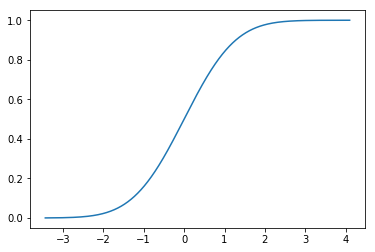

In [79]:

import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns
x = np.random.randn(10000) # generate samples from normal distribution (discrete data)
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete
    # plot the cdf
sns.lineplot(x=x, y=norm_cdf)
plt.show()

__PMF plotting__

1.0


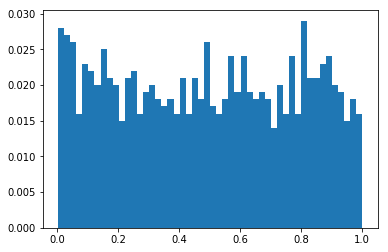

In [80]:
import math
import random
x = [random.random() for r in range(1000)]
num_bins = 50
counts, bins = np.histogram(x, bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print (probs.sum()) # 1.0
plt.bar(bins, probs, 1.0/num_bins)
plt.show()

__PDF__

So we have a given probability density function. The total area underneath the curve is equal to 1 (or 100%). The area underneath the curve at a particular interval represents the probability of some interval occurring in the probability density function. This has to be a number between 0 and 1.

In calculus, definite integration solves the probability of an interval occuring in a probability density function for a certain interval.

For example, let's say that we have a graph of temperature during the month of August. Let's say that the average temperature is 80°F. And the x-axis ranges in temperature from 65°F at the lower end to 95°F at the upper end. Let's say that we want to find the probability of the temperature being from 65°F to 80°F. We would set up a definite integral so that the range goes from 65 to 80. You do the integration substituting these values in and you have then calculated the probability for a temperature occurring from 65°F to 80°F for a particular probability density function.

So a probability density function represents a function composed of continuous random data values that can predict with integration in calculus the probability of the occurrence of a certain interval in the function, which is represented by the area underneath the curve.

Below we create the code that creates a probability density function using numpy, scipy, and matplotlib.


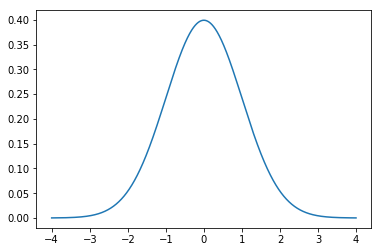

In [81]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import random

#x = np.random.randn(10000)
x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))

plt.show()

We first import norm from scipy.stats. This allows us to create a normalized probability density function.

We then import the numpy module as np. This means that we reference the numpy module with the keyword, np.

We then import the matplotlib module plotting function because we are going to plot the data.

So we use the numpy module to create the x-axis, we use sicpy to create a normalied probability density function, and then we use the matplotlib module to plot the data.

We create a variable, x, and assign it to, np.arange(-4,4,0.001)

What this line does is it creates an x-axis of values that range from -4 to 4 with an incremenet of 0.001.

We then plot a normalized probability density function with the line, plt.plot(x, norm.pdf(x))

We then show this graph plot with the line, plt.show() 

__Task 2__
     Create a function that converts any list into a PMF.  

__The function should return a dictionary with keys as the data values and values as the corresponding PMF values__

    candy  Total    pmf
0    Blue     30  0.375
1  Orange     18  0.225
2   Green     20  0.250
3  Purple     12  0.150


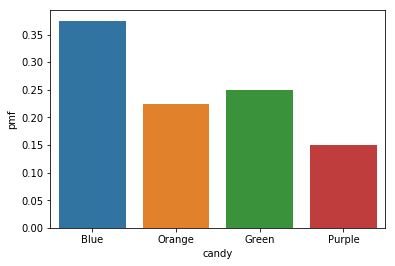

In [82]:
import pandas as pd
import numpy as np 
import matplotlib 
import seaborn as sns
from collections import Counter
data = {'candy':['Blue','Orange','Green','Purple'],
        'Total':[30,18,20,12]}
def pmf(data):
    df=pd.DataFrame(data)
    df['pmf'] = df['Total']/df['Total'].sum()
    print(df)
    sns.barplot(df['candy'],df['pmf'])

pmf(data)


 __Using the len-operator (Hint : use Counter(data) )__ 

In [83]:
from collections import Counter
C = Counter(df)
#for key, value in enumerate(C):
    #print(key,value)
C

Counter({'candy': 1, 'Total': 1, 'pmf': 1})

__Plot the resulting PMF using Pandas inbuilt plot command with 'bar' parameter. Make sure that the Series passed is sorted by the index. Use a decorator to make sure that is the case. If you want to recollect what is a decorator__

Counter({2: 3, 4: 3, 5: 3, 7: 3, 9: 2, 1: 2, 3: 2, 6: 2, 8: 2})


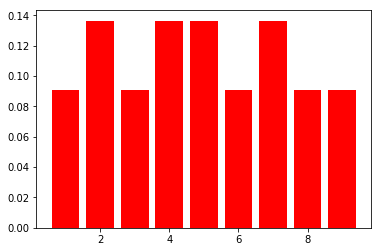

[1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9]

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from functools import wraps
X=[2,4,5,7,9,1,2,3,4,5,6,7,8,9,1,3,5,7,2,4,6,8]
def sorted_(func):
    @wraps(func)
    def inner(X):
        func(X)
        X.sort()        
        return X
    return inner
    
@sorted_    
def func(X):

   C=Counter(X)
   print(C)

   count = {}

   for observation in X:

       count[observation] = count.get(observation, 0) + 1

   n = len(X)

   probability_mass_function = {}

   for unique_value, count in count.items():

       probability_mass_function[unique_value] = count / n
       #print(probability_mass_function[unique_value])

   plt.bar(list(probability_mass_function.keys()), probability_mass_function.values(), color='r')

   plt.show()

func(X)



    

__Using the given lambda expression, tabulate the derived CDF at 4 arbitrarily chosen values (you can define them yourself).__

__f = lambda x: np.interp(x, p, data_sorted)__

In [106]:
def ran_4(num):

   output=[]

   for i in np.random.randint(0,len(num),4):

       output.append(num[i])

   return output


In [111]:
cdf_list= ran_4(f(x))

cdf_list

[-3.594532279446238,
 1.0000575174737854,
 -3.594532279446238,
 1.0928027056062035]

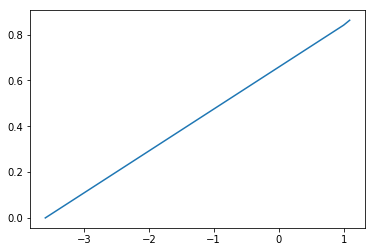

In [112]:
norm_cdf_list=scipy.stats.norm.cdf(cdf_list)

sns.lineplot(x=cdf_list,y=norm_cdf_list)

plt.show()

__Analyze the percentiles of the array used in point 3 using this function. You may use the Python file given and the percentile function defined below__

In [113]:
def percentile(N, percent, key=lambda x:x): 

    """ 

    Find the percentile of a list of values. 

 

    @parameter N - is a list of values. Note N MUST BE already sorted. 

    @parameter percent - a float value from 0.0 to 1.0. 

    @parameter key - optional key function to compute value from each element of N. 

 

    @return - the percentile of the values 

    """ 

    if N is None: 

        return None 

    k = (len(N)-1) * percent 

    f = math.floor(k) 

    c = math.ceil(k) 

    if f == c: 

        return key(N[int(k)]) 

    d0 = key(N[int(f)]) * (c-k) 

    d1 = key(N[int(c)]) * (k-f) 

    return d0+d1 

In [114]:
np.percentile(f(x), 25)

-3.594532279446238

In [119]:
N=[1,2,3,4,5,6,6,]

import functools

np.percentile(N, 25)

2.5